#📌 Extracão

In [1]:
import pandas as pd

# Recarrega os dados
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"
df = pd.read_json(url)

# Normalizando as colunas aninhadas
df_normalizado = pd.json_normalize(df.to_dict(orient='records'))

# Exibir o DataFrame
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### 📌 Extração dos Dados

Nesta etapa, realizamos a extração dos dados da Telecom X diretamente de uma fonte online. Os dados estavam disponíveis em formato JSON em um repositório do GitHub. Utilizamos a biblioteca `pandas` para carregar os dados de forma eficiente.

Inicialmente, o arquivo JSON continha colunas com estruturas aninhadas (dicionários), o que dificulta a manipulação direta. Para resolver isso, utilizamos a função `pd.json_normalize()` para transformar essas estruturas em colunas planas, facilitando as etapas seguintes do processo ETL.

Com isso, agora temos um DataFrame estruturado, pronto para a próxima fase: a transformação dos dados.


#🔧 Transformação

In [2]:
# Informações gerais: número de entradas, colunas e tipos
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [3]:
# Tipos de dados das colunas
df_normalizado.dtypes

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

In [4]:
# Exibir as primeiras linhas para revisar a estrutura geral
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

✅ Colunas importantes para evasão (Churn):
Coluna-alvo: Churn

Demográficas: customer.gender, customer.SeniorCitizen, customer.Partner, customer.Dependents

Comportamento: customer.tenure, phone.PhoneService, internet.InternetService, internet.OnlineSecurity, etc.

Financeiras: account.Contract, account.Charges.Monthly, account.Charges.Total

### 🔧 Transformação - Etapa 1: Conhecendo o Dataset

Nesta etapa, o objetivo foi compreender a estrutura do dataset carregado para identificar quais variáveis são relevantes para a análise de evasão de clientes (churn).

As seguintes ações foram realizadas:

- 🔍 Utilizamos o método `df_normalizado.info()` para verificar o número de entradas, colunas e tipos de dados.
- 📑 Consultamos o [dicionário de dados](https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_dicionario.md) para entender o significado de cada variável.
- 🎯 Identificamos colunas potencialmente relevantes para prever a evasão, como:
  - Demográficas: `customer.gender`, `customer.SeniorCitizen`, `customer.Partner`, `customer.Dependents`
  - De serviços contratados: `phone.PhoneService`, `internet.InternetService`, `internet.OnlineSecurity`, etc.
  - Financeiras e contratuais: `account.Contract`, `account.PaymentMethod`, `account.Charges.Monthly`, `account.Charges.Total`
  - Variável alvo: `Churn`

Essa análise inicial é essencial para orientar as próximas etapas de limpeza e preparação dos dados.


In [5]:
# 1. Verificar valores ausentes
print("🔍 Valores ausentes por coluna:\n")
print(df_normalizado.isnull().sum())

# 2. Verificar duplicatas (baseada no ID do cliente)
print("\n📋 Linhas duplicadas com base em customerID:\n")
print(df_normalizado.duplicated(subset='customerID').sum())

# 3. Verificar tipos de dados novamente
print("\n🔍 Tipos de dados das colunas:\n")
print(df_normalizado.dtypes)

# 4. Conferir valores únicos por coluna categórica
colunas_categoricas = df_normalizado.select_dtypes(include='object').columns

print("\n📌 Valores únicos por coluna categórica:\n")
for col in colunas_categoricas:
    print(f"{col}: {df_normalizado[col].unique()}\n")


🔍 Valores ausentes por coluna:

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

📋 Linhas duplicadas com base em customerID:

0

🔍 Tipos de dados das colunas:

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
cu

### 🔧 Transformação - Etapa 2: Verificando Inconsistências nos Dados

Nesta etapa, analisamos possíveis problemas no dataset que poderiam comprometer a análise e a qualidade do modelo. Verificamos a existência de valores ausentes, duplicados, tipos de dados inadequados e inconsistências nas categorias.

As verificações e achados foram:

- ✅ **Valores ausentes:** Nenhuma coluna possui valores `NaN`, mas identificamos **valores vazios (`''`) na coluna `Churn`**, que precisam ser tratados.
- ✅ **Duplicatas:** Nenhuma linha duplicada com base na coluna `customerID`.
- ⚠️ **Tipo incorreto:** A coluna `account.Charges.Total` está como `object`, mas deveria ser numérica (`float`). Isso indica presença de valores não numéricos (como strings vazias) que precisam ser convertidos corretamente.
- ⚠️ **Categorias inconsistentes:** Algumas colunas categóricas contêm valores como `"No internet service"` ou `"No phone service"`. Esses valores são redundantes e poderão ser padronizados para `"No"`, facilitando a análise e a modelagem.

Esses pontos servirão como base para a próxima etapa, onde realizaremos o tratamento direto dessas inconsistências.


In [6]:
# Criando uma cópia do DataFrame para manter o original intacto
df_tratado = df_normalizado.copy()

# 1. Substituir valores vazios na coluna 'Churn' por NaN e remover esses registros
import numpy as np
df_tratado['Churn'] = df_tratado['Churn'].replace('', np.nan)
df_tratado = df_tratado.dropna(subset=['Churn'])

# 2. Corrigir tipo da coluna 'account.Charges.Total'
# Substituir strings vazias por NaN
df_tratado['account.Charges.Total'] = df_tratado['account.Charges.Total'].replace(' ', np.nan)
# Converter para float
df_tratado['account.Charges.Total'] = df_tratado['account.Charges.Total'].astype(float)

# 3. Padronizar categorias como "No internet service" e "No phone service" para "No"
colunas_com_no_service = [
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

for col in colunas_com_no_service:
    df_tratado[col] = df_tratado[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# 4. Confirmar se tudo foi aplicado corretamente
print("✔️ Tipos de dados corrigidos:")
print(df_tratado.dtypes)

print("\n🧼 Valores ausentes após tratamento:")
print(df_tratado.isnull().sum())

✔️ Tipos de dados corrigidos:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object

🧼 Valores ausentes após tratamento:
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partn

In [7]:
df_tratado['account.Charges.Total'] = df_tratado['account.Charges.Total'].fillna(0)
print(df_tratado.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


### 🔧 Transformação - Etapa 3: Tratando as Inconsistências

Com as inconsistências identificadas na etapa anterior, realizamos os seguintes tratamentos para garantir a integridade e consistência do dataset:

- 🧹 **Remoção de registros inválidos:** Substituímos valores vazios (`''`) na coluna `Churn` por `NaN` e eliminamos esses registros do DataFrame.
- 🔄 **Conversão de tipos:** A coluna `account.Charges.Total`, originalmente do tipo `object`, foi convertida para `float64`. Antes disso, valores vazios foram convertidos em `NaN`.
- 🧼 **Padronização de categorias:** Valores como `"No internet service"` e `"No phone service"` foram padronizados como `"No"` em colunas relacionadas aos serviços, para evitar ambiguidade e facilitar a análise.
- ➕ **Preenchimento de valores ausentes:** Após a conversão de `account.Charges.Total`, restaram 11 valores ausentes, que foram preenchidos com `0`, assumindo que representam clientes novos ou cobranças não aplicáveis.

Com isso, o dataset está limpo, completo e padronizado, pronto para a etapa de análise exploratória.


In [8]:
# Criar coluna 'Contas_Diarias' com base no valor mensal dividido por 30 dias
df_tratado['Contas_Diarias'] = df_tratado['account.Charges.Monthly'] / 30

# Visualizar as primeiras linhas para conferência
df_tratado[['account.Charges.Monthly', 'Contas_Diarias']].head()

,account.Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


### 🔧 Transformação - Etapa 4: Coluna de Contas Diárias

Nesta etapa, foi criada uma nova variável chamada `Contas_Diarias`, com o objetivo de fornecer uma visão mais granular do comportamento financeiro dos clientes da Telecom X.

A coluna foi derivada da variável `account.Charges.Monthly`, que representa o valor da fatura mensal de cada cliente. Para obter uma média de gasto diário, utilizamos a seguinte fórmula:


Assumimos que cada mês tem em média 30 dias, de modo a facilitar a análise. Essa transformação permite entender o comportamento de pagamento com maior detalhamento, o que pode ser útil para identificar padrões de evasão relacionados ao custo diário percebido.

A nova coluna foi adicionada ao DataFrame `df_tratado` e está pronta para ser utilizada nas próximas análises.


In [9]:
# Colunas booleanas para conversão
colunas_binarias = [
    'Churn', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling'
]

# Conversão de Yes/No para 1/0
df_tratado[colunas_binarias] = df_tratado[colunas_binarias].replace({'Yes': 1, 'No': 0})

# Visualizar amostra das colunas convertidas
df_tratado[colunas_binarias].head()

C:\Users\Karol Rodrigues\AppData\Local\Temp\ipykernel_640\693364518.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tratado[colunas_binarias] = df_tratado[colunas_binarias].replace({'Yes': 1, 'No': 0})


,Churn,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling
0,0,1,1,1,0,0,1,0,1,1,0,1
1,0,0,0,1,1,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1
3,1,1,0,1,0,0,1,1,0,1,1,1
4,1,1,0,1,0,0,0,0,1,1,0,1


In [10]:
df_tratado.rename(columns={
    'customerID': 'ID_Cliente',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.tenure': 'MesesCliente',
    'account.Charges.Monthly': 'ValorMensal',
    'account.Charges.Total': 'ValorTotal',
    'account.Contract': 'TipoContrato',
    'account.PaymentMethod': 'MetodoPagamento',
    'account.PaperlessBilling': 'FaturaDigital',
    'phone.PhoneService': 'TelefoneAtivo',
    'phone.MultipleLines': 'MultiplasLinhas',
    'internet.InternetService': 'TipoInternet',
    'internet.OnlineSecurity': 'SegurancaOnline',
    'internet.OnlineBackup': 'BackupOnline',
    'internet.DeviceProtection': 'ProtecaoDispositivo',
    'internet.TechSupport': 'SuporteTecnico',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingFilmes'
}, inplace=True)

# Visualizar primeiras colunas do DataFrame renomeado
df_tratado.head()

,ID_Cliente,Churn,Genero,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet,...,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,TipoContrato,FaturaDigital,MetodoPagamento,ValorMensal,ValorTotal,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


### 🔧 Transformação - Etapa 5: Padronização e Transformação de Dados (Opcional)

Nesta etapa opcional, realizamos transformações que visam tornar os dados mais consistentes, claros e adequados para análises quantitativas e apresentação a stakeholders.

As ações realizadas foram:

- 🔢 **Conversão de valores textuais binários:** Colunas com respostas "Yes" e "No" foram convertidas para 1 e 0, facilitando o uso futuro em modelos analíticos. Isso incluiu variáveis como `Churn`, `Partner`, `Dependents`, `PhoneService`, `OnlineSecurity`, entre outras.
  
- 🏷️ **Renomeação de colunas:** Diversas colunas foram renomeadas para termos mais simples e intuitivos, tornando o dataset mais legível para humanos e mais prático para uso em análises e visualizações. Por exemplo:
  - `customer.tenure` → `MesesCliente`
  - `account.Charges.Total` → `ValorTotal`
  - `internet.OnlineSecurity` → `SegurancaOnline`

Essas mudanças não afetam os dados em si, mas tornam o processo de exploração, visualização e comunicação dos resultados mais fluido e eficiente.


#📊 Carga e análise

In [11]:
# Análise descritiva das colunas numéricas
df_tratado.describe()

,Churn,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,FaturaDigital,ValorMensal,ValorTotal,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [12]:
# Contagem de valores únicos por coluna categórica
df_tratado.select_dtypes(include='object').describe()

,ID_Cliente,Genero,TipoInternet,TipoContrato,MetodoPagamento
count,7043,7043,7043,7043,7043
unique,7043,2,3,3,4
top,0002-ORFBO,Male,Fiber optic,Month-to-month,Electronic check
freq,1,3555,3096,3875,2365


### 📊 Análise Descritiva

Nesta etapa, realizamos uma análise descritiva das variáveis numéricas e categóricas com o objetivo de entender a distribuição, a dispersão e os padrões predominantes nos dados dos clientes da Telecom X.

#### 🔢 Variáveis Numéricas:
- A média de permanência dos clientes (`MesesCliente`) é de **32,37 meses**, com valores entre **0** e **72** meses.
- O valor médio da fatura mensal (`ValorMensal`) é de aproximadamente **R$ 64,76**, com um valor máximo de **R$ 118,75**.
- A despesa total média (`ValorTotal`) é de **R$ 2.279,73**, com variação significativa (desvio padrão alto).
- A média de gasto diário (`Contas_Diarias`) é de **R$ 2,16**.

#### 📌 Evasão (`Churn`):
- A média de `Churn` é **0,265**, o que indica que aproximadamente **26,5%** dos clientes desistiram do serviço.

#### 🧍‍♂️ Variáveis Categóricas:
- **Gênero**: A distribuição entre `Male` e `Female` é relativamente equilibrada (maioria masculina com 3.555 registros).
- **Tipo de Internet**: A maioria dos clientes utiliza **Fiber optic** (3.096 registros).
- **Tipo de Contrato**: A maior parte tem **contrato mensal** (3.875 clientes).
- **Método de Pagamento**: O mais comum é **Electronic check**, usado por 2.365 clientes.

Essas informações fornecem uma base sólida para compreender o perfil dos clientes e suas características, servindo de apoio para as próximas etapas da análise de evasão.


In [13]:
# Contagem absoluta
print(df_tratado['Churn'].value_counts())

# Contagem percentual
print(df_tratado['Churn'].value_counts(normalize=True) * 100)

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


C:\Users\Karol Rodrigues\AppData\Local\Temp\ipykernel_640\795946843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tratado, x='Churn', palette='Set2')


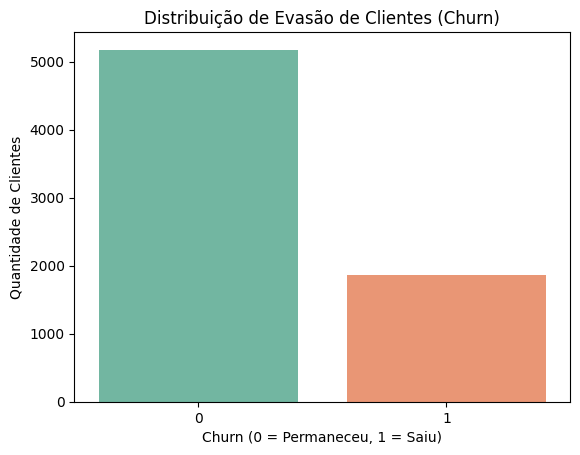

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras
sns.countplot(data=df_tratado, x='Churn', palette='Set2')
plt.title('Distribuição de Evasão de Clientes (Churn)')
plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Quantidade de Clientes')
plt.show()


### 📊 Carga e Análise - Card 2: Distribuição da Evasão

Nesta etapa, analisamos a distribuição da variável `Churn`, que representa a evasão de clientes da Telecom X. O objetivo foi entender a proporção entre clientes que permaneceram e os que cancelaram o serviço.

#### 🔢 Resultados:

- **Permaneceram (Churn = 0):** 5.174 clientes (**73,5%**)
- **Evadiram (Churn = 1):** 1.869 clientes (**26,5%**)

#### 📊 Visualização:

Utilizamos um gráfico de barras para ilustrar essa proporção, deixando claro que a maioria dos clientes manteve o vínculo com a empresa. Essa visualização também evidenciou que existe um leve desbalanceamento na variável `Churn`, algo importante de ser considerado em análises mais avançadas e modelagens futuras.

Essa análise fornece uma base sólida para as próximas etapas, onde exploraremos como essa evasão se distribui entre diferentes grupos de clientes.

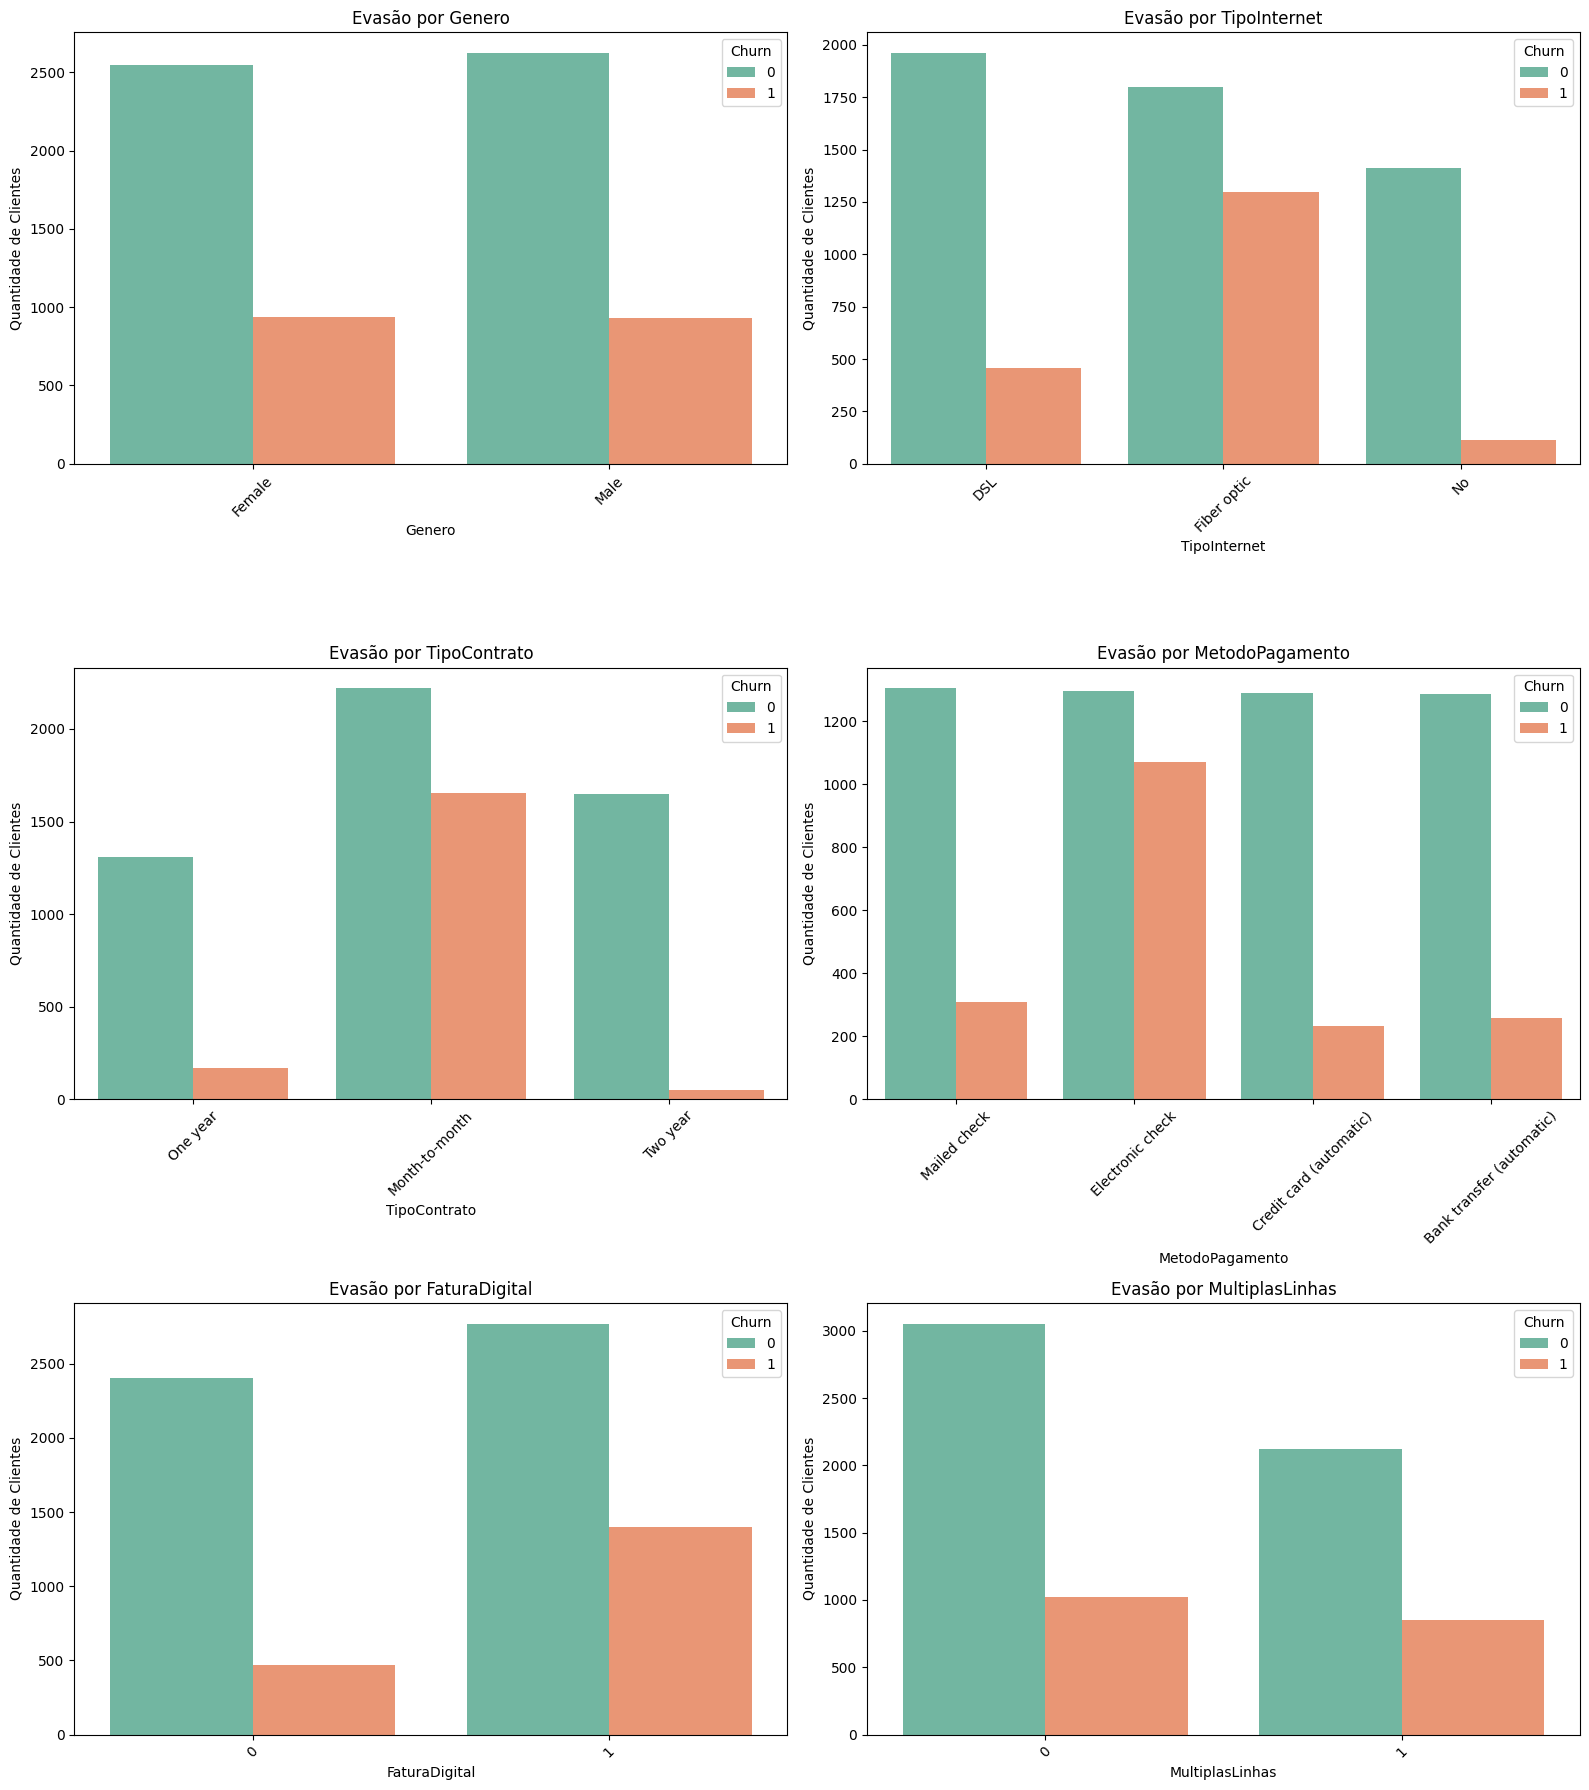

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de colunas categóricas para análise
variaveis_categoricas = ['Genero', 'TipoInternet', 'TipoContrato', 'MetodoPagamento', 'FaturaDigital', 'MultiplasLinhas']

# Configura o layout dos gráficos
plt.figure(figsize=(16, 18))

# Cria um gráfico para cada variável categórica
for i, coluna in enumerate(variaveis_categoricas, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df_tratado, x=coluna, hue='Churn', palette='Set2')
    plt.title(f'Evasão por {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Quantidade de Clientes')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 📊 Carga e Análise - Card 3: Contagem de Evasão por Variáveis Categóricas

Nesta etapa, exploramos a relação entre a evasão de clientes (`Churn`) e algumas variáveis categóricas do dataset, com o objetivo de identificar perfis com maior propensão ao cancelamento do serviço.

Foram analisadas as seguintes variáveis:

- `Genero`
- `TipoInternet`
- `TipoContrato`
- `MetodoPagamento`
- `FaturaDigital`
- `MultiplasLinhas`

#### 📊 Visualização:
Para cada variável, foram gerados gráficos de barras segmentados por `Churn`, permitindo observar a distribuição entre clientes que permaneceram (Churn = 0) e os que evadiram (Churn = 1).

#### 🔍 Principais percepções:

- **Tipo de contrato:** A evasão é significativamente maior entre clientes com contrato do tipo *"Month-to-month"*.
- **Método de pagamento:** Clientes que utilizam *"Electronic check"* apresentam maior taxa de evasão.
- **Tipo de internet:** Usuários de *"Fiber optic"* tendem a evadir mais que os que utilizam *"DSL"* ou não possuem internet.
- **Fatura digital:** Aparentemente, há uma leve tendência de evasão maior entre quem opta pela fatura digital (*Paperless Billing*).
- **Multiplas linhas:** Clientes com múltiplas linhas apresentam evasão levemente superior.
- **Gênero:** Não há diferenças expressivas de evasão entre homens e mulheres.

Essas análises ajudam a entender melhor quais perfis de clientes demandam atenção especial por parte da empresa para reduzir a taxa de churn.


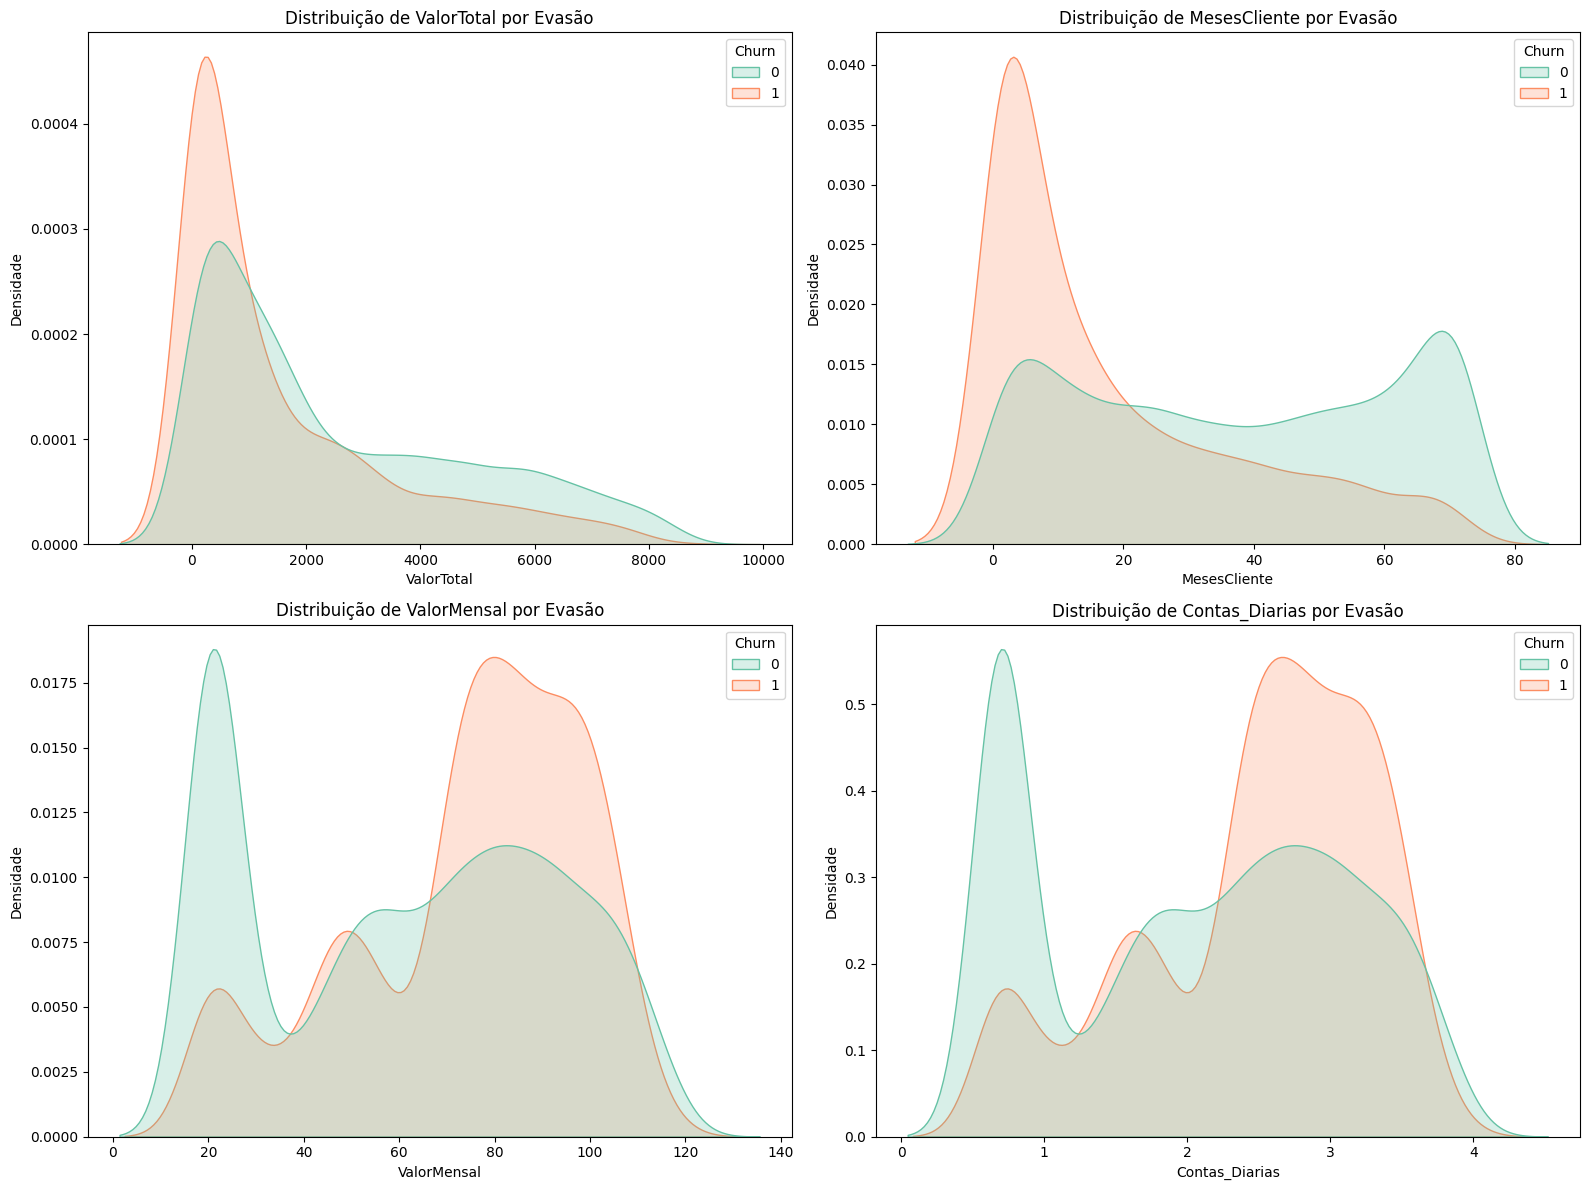

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variáveis numéricas a analisar
variaveis_numericas = ['ValorTotal', 'MesesCliente', 'ValorMensal', 'Contas_Diarias']

# Tamanho do gráfico
plt.figure(figsize=(16, 12))

# Criar um gráfico para cada variável numérica
for i, var in enumerate(variaveis_numericas, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df_tratado, x=var, hue='Churn', fill=True, common_norm=False, palette='Set2')
    plt.title(f'Distribuição de {var} por Evasão')
    plt.xlabel(var)
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()


### 📊 Carga e Análise - Card 4: Contagem de Evasão por Variáveis Numéricas

Nesta etapa, analisamos a distribuição de variáveis numéricas em relação à evasão (`Churn`) para identificar padrões e tendências entre clientes que permaneceram e os que cancelaram o serviço.

#### 🔍 Variáveis analisadas:
- `ValorTotal` (gasto total)
- `MesesCliente` (tempo como cliente)
- `ValorMensal` (fatura mensal)
- `Contas_Diarias` (gasto diário estimado)

#### 📈 Principais percepções:

- **Meses como cliente (`MesesCliente`)**: A densidade de evasão é claramente maior entre clientes com pouco tempo de casa. Quanto mais recente o cliente, maior a probabilidade de churn.
- **Gasto total (`ValorTotal`)**: Clientes que evadiram tendem a ter um gasto total menor. Isso reforça que churn está mais associado a clientes novos ou com pouco histórico financeiro.
- **Valor mensal (`ValorMensal`)**: Há uma maior concentração de churn entre clientes com faturas mensais mais altas, o que pode indicar sensibilidade ao preço.
- **Gasto diário (`Contas_Diarias`)**: O padrão é similar ao do valor mensal — valores diários mais altos tendem a estar associados à evasão.

Esses insights quantitativos ajudam a entender o comportamento dos clientes e oferecem bases sólidas para estratégias de retenção.


# 📌Extra: Análise de Correlação entre Variáveis

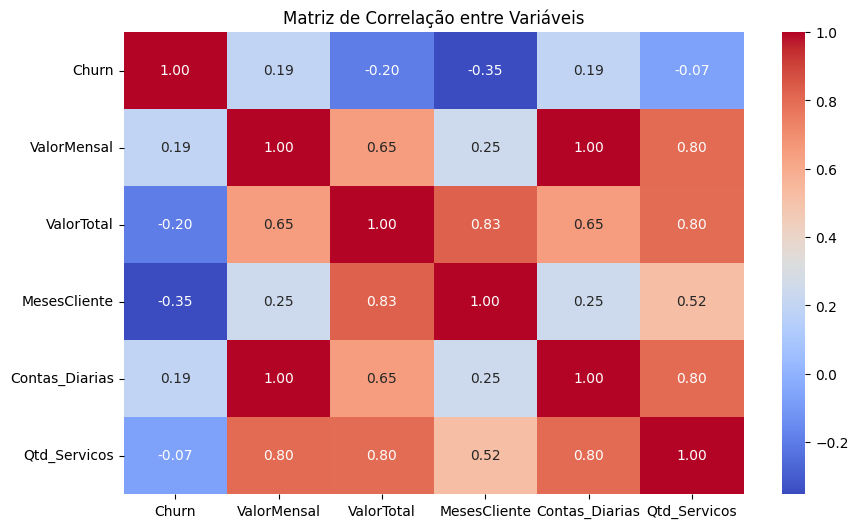

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Criar uma nova coluna com a quantidade de serviços contratados
servicos = [
    'TelefoneAtivo', 'MultiplasLinhas', 'SegurancaOnline',
    'BackupOnline', 'ProtecaoDispositivo', 'SuporteTecnico',
    'StreamingTV', 'StreamingFilmes'
]

# Soma os serviços contratados (1 = sim, 0 = não)
df_tratado['Qtd_Servicos'] = df_tratado[servicos].sum(axis=1)

# 2. Selecionar colunas numéricas para a matriz de correlação
variaveis_correlacao = ['Churn', 'ValorMensal', 'ValorTotal', 'MesesCliente', 'Contas_Diarias', 'Qtd_Servicos']

# 3. Calcular matriz de correlação
matriz_corr = df_tratado[variaveis_correlacao].corr()

# 4. Visualizar matriz com heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis')
plt.show()


### 📊 Análise Extra: Correlação entre Variáveis

Nesta etapa opcional, exploramos as correlações entre variáveis numéricas com o objetivo de identificar relações que possam influenciar a evasão de clientes (`Churn`).

#### 📈 Variáveis analisadas:
- `ValorMensal`
- `ValorTotal`
- `MesesCliente`
- `Contas_Diarias`
- `Qtd_Servicos` (nova variável criada com a soma dos serviços contratados)

#### 🔍 Principais correlações com `Churn`:

- `MesesCliente`: **-0,35** → Quanto menor o tempo como cliente, maior a probabilidade de evasão.
- `ValorTotal`: **-0,20** → Clientes com menor valor total tendem a evadir mais (reforça que churn ocorre mais entre clientes recentes).
- `ValorMensal` e `Contas_Diarias`: **+0,19** → Pequena correlação positiva, indicando que faturas mais altas podem estar levemente associadas à evasão.
- `Qtd_Servicos`: **-0,07** → Pouca correlação, mas sugere que contratar mais serviços pode reduzir levemente a evasão.

#### 🧠 Conclusão:
Essas correlações ajudam a priorizar variáveis relevantes para uma futura modelagem preditiva. O destaque vai para `MesesCliente` e `ValorTotal`, que têm relação negativa mais significativa com a evasão, indicando que **clientes novos com baixo histórico de pagamento estão mais propensos a cancelar o serviço**.


#📄Relatorio Final

# 📄 Relatório Final – Análise de Evasão de Clientes (Churn) - Telecom X

## 🧭 Introdução

A empresa Telecom X está enfrentando um problema recorrente de **evasão de clientes** (Churn), o que impacta diretamente sua receita e sustentabilidade. Com o objetivo de entender os fatores que levam ao cancelamento do serviço, este trabalho teve como foco a análise exploratória dos dados de clientes, com base em um processo completo de ETL (Extração, Transformação e Carga).

O objetivo principal é gerar **insights a partir dos dados** para auxiliar a empresa na **redução da taxa de churn** por meio de estratégias baseadas em evidências.

---

## 🧹 Limpeza e Tratamento de Dados

O dataset original foi extraído de um arquivo JSON hospedado no GitHub e transformado com o uso do `pandas`. A estrutura dos dados incluía colunas aninhadas, que foram normalizadas para facilitar a análise. As etapas de tratamento incluíram:

- Remoção de valores inconsistentes na variável `Churn` (valores vazios).
- Conversão da coluna `account.Charges.Total` para formato numérico.
- Padronização de valores como `"No internet service"` para `"No"`.
- Criação da variável `Contas_Diarias` com base no valor mensal dividido por 30 dias.
- Conversão de valores binários `"Yes"` e `"No"` para `1` e `0`.
- Renomeação de colunas para facilitar a leitura e compreensão do conjunto de dados.

Após a limpeza, o dataset final continha 7.043 registros válidos e prontos para análise.

---

## 📊 Análise Exploratória de Dados (EDA)

### Distribuição da Evasão
- **26,5%** dos clientes cancelaram o serviço (`Churn = 1`).
- A maior parte (73,5%) permaneceu com a operadora.

### Evasão por Variáveis Categóricas
- Clientes com **contrato mensal** apresentaram maior evasão.
- O método de pagamento **Electronic check** teve a maior taxa de churn.
- Usuários de **internet via fibra óptica** evadiram mais do que os de DSL ou sem internet.
- A **fatura digital** também apresentou uma leve associação com maior evasão.
- **Gênero** não apresentou diferença significativa.

### Evasão por Variáveis Numéricas
- Clientes que evadiram tendem a ter:
  - **Menor tempo de contrato**
  - **Menor valor total gasto**
  - **Maior valor mensal**
  - **Maior gasto diário**

---

## 🔗 Análise de Correlação entre Variáveis (Extra)

Como etapa complementar, foi realizada uma análise de correlação entre variáveis numéricas do dataset. O objetivo foi identificar relações que possam estar associadas à evasão de clientes (`Churn`), oferecendo suporte para modelagens futuras e ações estratégicas.

#### 🔍 Destaques da matriz de correlação:

- **Tempo como cliente (`MesesCliente`)** apresentou correlação negativa com `Churn` (-0,35), indicando que clientes mais antigos têm menor chance de evasão.
- **Valor total gasto (`ValorTotal`)** também teve correlação negativa (-0,20), reforçando que churn ocorre com maior frequência entre clientes novos.
- **Valor mensal (`ValorMensal`)** e **conta diária (`Contas_Diarias`)** mostraram correlação positiva leve (~+0,19) com churn, sugerindo que faturas mais altas podem elevar o risco de cancelamento.
- **Quantidade de serviços contratados (`Qtd_Servicos`)** teve baixa correlação com churn (-0,07), mas ainda assim aponta uma leve tendência de retenção entre clientes com mais serviços.

#### 📌 Conclusão:
Essa análise adicional reforça achados anteriores e fornece suporte quantitativo para priorizar variáveis-chave em modelos preditivos ou estratégias de retenção.

---

## 📌 Conclusões e Insights

A análise revelou que:
- **Tempo como cliente** é um forte indicador de fidelidade. Clientes novos evadem com mais frequência.
- **Custo percebido** pode ser um fator importante: faturas mais altas e métodos de pagamento menos automatizados estão associados à evasão.
- **Tipo de contrato** influencia fortemente o churn, sugerindo que contratos mais longos retêm melhor os clientes.

---

## 💡 Recomendações

Com base nos achados, recomenda-se:

1. **Incentivar contratos de maior duração**, oferecendo benefícios para migração do modelo mensal.
2. **Oferecer descontos progressivos** para novos clientes ao longo dos primeiros meses.
3. **Revisar a política de preços para clientes com faturas mensais altas**, identificando oportunidades de retenção.
4. **Melhorar a comunicação com usuários que usam métodos de pagamento manuais** (como Electronic Check), incentivando a automação.
5. **Investir em ações específicas para clientes de fibra óptica**, como melhorias de serviço ou atendimento personalizado.

---

Este relatório representa uma base sólida para ações estratégicas voltadas à **redução da evasão de clientes da Telecom X**, com base em dados reais e evidências claras.

